In [1]:
#importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#loading the data
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
df.shape

(50000, 8)

In [4]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [6]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [7]:
#the taxi fare amount cannot be less than 2.5 ruppes. we are assigning it to pd1
pd1 = df[df["amount"]<2.5].index

In [8]:
#dropping the amount which is less than 2.5
df.drop(pd1,inplace=True)

In [9]:
#importing time and date 
import datetime

In [10]:

pd.to_datetime(df["date_time_of_pickup"])

0       2009-06-15 17:26:21+00:00
1       2010-01-05 16:52:16+00:00
2       2011-08-18 00:35:00+00:00
3       2012-04-21 04:30:42+00:00
4       2010-03-09 07:51:00+00:00
                   ...           
49995   2013-06-12 23:25:15+00:00
49996   2015-06-22 17:19:18+00:00
49997   2011-01-30 04:53:00+00:00
49998   2012-11-06 07:09:00+00:00
49999   2010-01-13 08:13:14+00:00
Name: date_time_of_pickup, Length: 49990, dtype: datetime64[ns, UTC]

In [11]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [12]:
#UTC is converted into 00:00
df["date_time_of_pickup"]=pd.to_datetime(df["date_time_of_pickup"])-datetime.timedelta(hours=4)

In [13]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [14]:
df["date_time_of_pickup"].dt.month

0         6
1         1
2         8
3         4
4         3
         ..
49995     6
49996     6
49997     1
49998    11
49999     1
Name: date_time_of_pickup, Length: 49990, dtype: int64

In [15]:
#dividing time, year ,month separetly
df["Year"]=df["date_time_of_pickup"].dt.year
df["Month"]=df["date_time_of_pickup"].dt. month
df["Day"]=df["date_time_of_pickup"].dt.day
df["Hours"]=df["date_time_of_pickup"].dt.hour
df["Minutes"]=df["date_time_of_pickup"].dt.minute



In [16]:
#dropping the columns
df.drop(["date_time_of_pickup","unique_id"],axis=1,inplace=True)

In [17]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Hours,Minutes
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,13,26
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,12,52
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,17,20,35
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,0,30
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,3,51


In [18]:
#assigning values with respetive to longitude and latitude
df["p1"] = df["latitude_of_pickup"]
df["p2"] = df["latitude_of_dropoff"]
df["q1"] = df["longitude_of_pickup"]
df["q2"] = df["longitude_of_dropoff"]

In [19]:
#euclidean distance
df["Distance"] = np.sqrt((np.square(df["p1"]-df["p2"]))+(np.square(df["q1"]-df["q2"])))


In [20]:
#dropping the columns
df.drop(["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"],axis=1,inplace=True)

In [21]:
#outlier treatment
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [22]:
low,upp=remove_outlier(df['amount'])
df["amount"]=np.where(df['amount']>upp,upp,df['amount'])
df["amount"]=np.where(df['amount']<low,low,df['amount'])

In [23]:
low,upp=remove_outlier(df['Distance'])
df["Distance"]=np.where(df['Distance']>upp,upp,df['Distance'])
df["Distance"]=np.where(df['Distance']<low,low,df['Distance'])

In [24]:
low,upp=remove_outlier(df['no_of_passenger'])
df["no_of_passenger"]=np.where(df['no_of_passenger']>upp,upp,df['no_of_passenger'])
df["no_of_passenger"]=np.where(df['no_of_passenger']<low,low,df['no_of_passenger'])

In [25]:
df.head()

,amount,no_of_passenger,Year,Month,Day,Hours,Minutes,p1,p2,q1,q2,Distance
0,4.5,1.0,2009,6,15,13,26,40.721319,40.712278,-73.844311,-73.841610,0.009436
1,16.9,1.0,2010,1,5,12,52,40.711303,40.782004,-74.016048,-73.979268,0.077990
2,5.7,2.0,2011,8,17,20,35,40.761270,40.750562,-73.982738,-73.991242,0.013674
3,7.7,1.0,2012,4,21,0,30,40.733143,40.758092,-73.987130,-73.991567,0.025340
4,5.3,1.0,2010,3,9,3,51,40.768008,40.783762,-73.968095,-73.956655,0.019470


In [26]:
df.head()

,amount,no_of_passenger,Year,Month,Day,Hours,Minutes,p1,p2,q1,q2,Distance
0,4.5,1.0,2009,6,15,13,26,40.721319,40.712278,-73.844311,-73.841610,0.009436
1,16.9,1.0,2010,1,5,12,52,40.711303,40.782004,-74.016048,-73.979268,0.077990
2,5.7,2.0,2011,8,17,20,35,40.761270,40.750562,-73.982738,-73.991242,0.013674
3,7.7,1.0,2012,4,21,0,30,40.733143,40.758092,-73.987130,-73.991567,0.025340
4,5.3,1.0,2010,3,9,3,51,40.768008,40.783762,-73.968095,-73.956655,0.019470


C:\Users\rupes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance', ylabel='amount'>

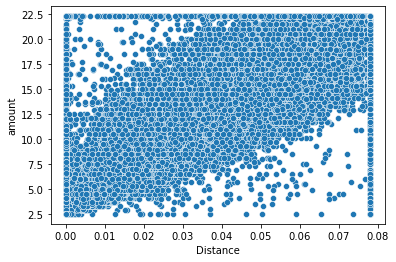

In [27]:
sns.scatterplot(df["Distance"],df["amount"])

C:\Users\rupes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours', ylabel='count'>

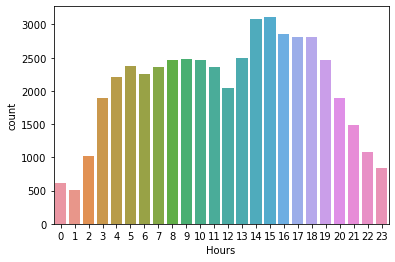

In [28]:
sns.countplot(df["Hours"])

C:\Users\rupes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='count'>

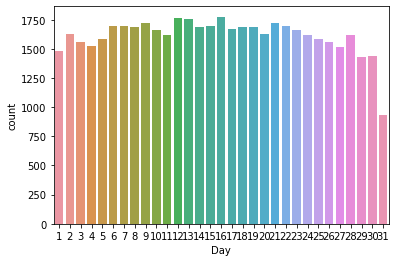

In [29]:
sns.countplot(df["Day"])

<AxesSubplot:xlabel='Year', ylabel='count'>

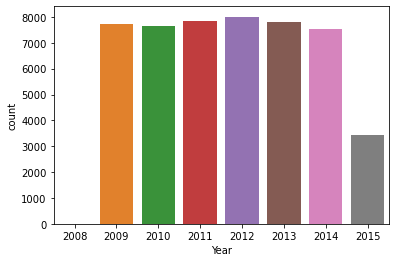

In [30]:
sns.countplot(x="Year",data=df)

Text(0, 0.5, 'amount')

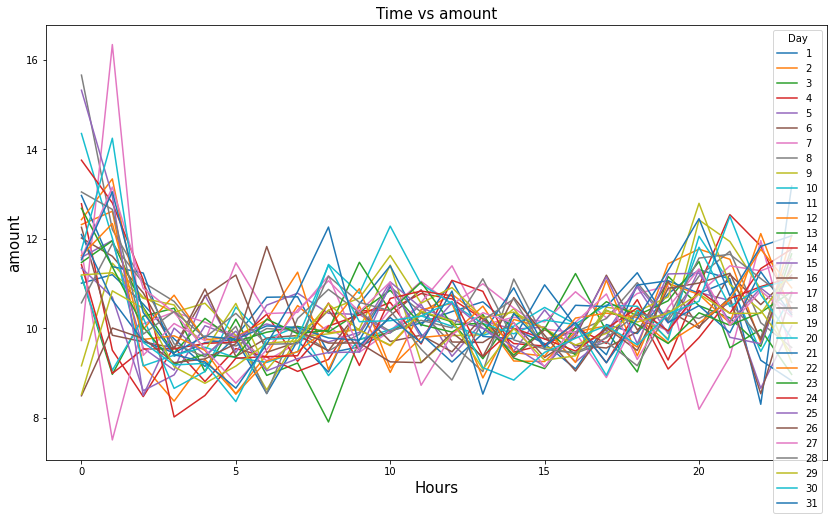

In [31]:
df.pivot_table(index='Hours', columns='Day', values="amount",aggfunc="mean").plot(figsize=(14,8))
plt.title("Time vs amount",fontsize=(15))
plt.xlabel("Hours",fontsize=(15))
plt.ylabel('amount',fontsize=(15))

Text(0, 0.5, 'Distance')

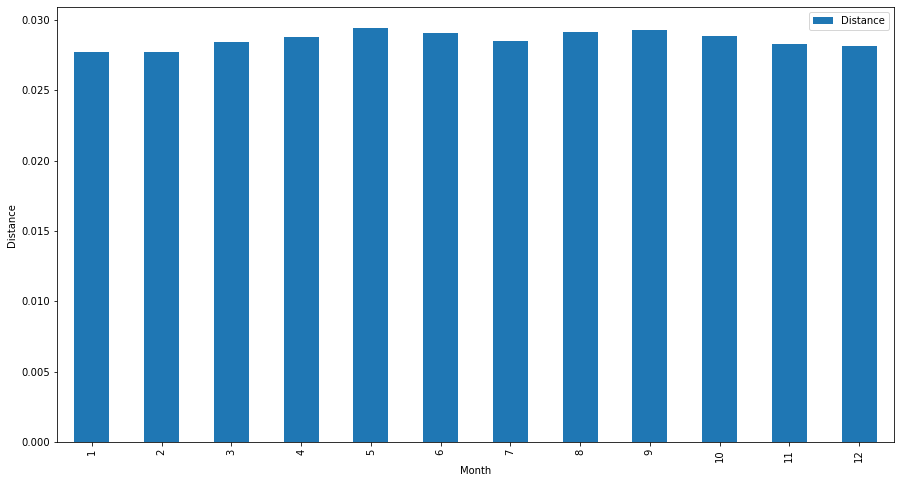

In [32]:
df.pivot_table(index="Month",values= "Distance",aggfunc="mean").plot(figsize=(15,8),kind='bar')
plt.xlabel("Month")
plt.ylabel("Distance")

Text(0, 0.5, 'amount')

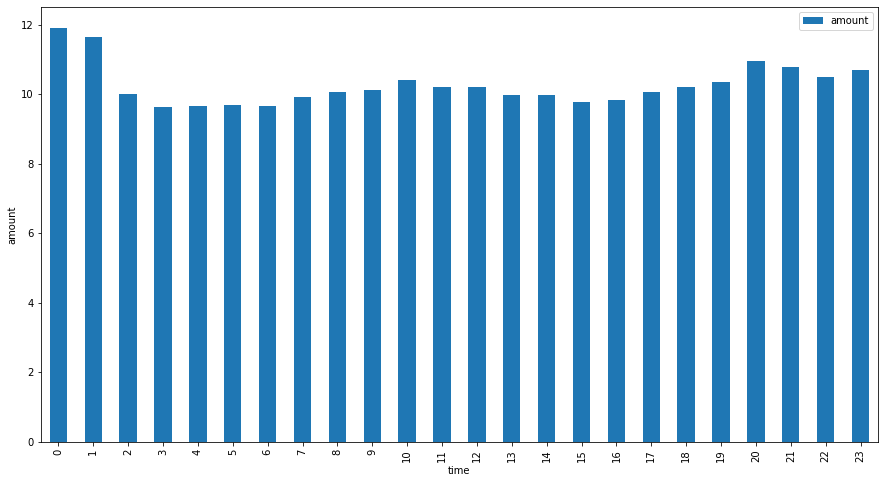

In [33]:
df.pivot_table(index="Hours",values= "amount",aggfunc="mean").plot(figsize=(15,8),kind='bar')
plt.xlabel("time")
plt.ylabel("amount")

<AxesSubplot:xlabel='no_of_passenger', ylabel='count'>

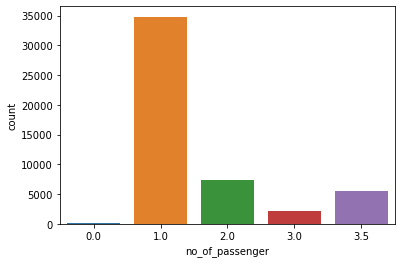

In [34]:
sns.countplot(x="no_of_passenger",data=df)

In [35]:
#scaling
from sklearn.preprocessing import StandardScaler
got=StandardScaler()
got

StandardScaler()

In [36]:
df['Month']=got.fit_transform(df[['Month']])

In [37]:
df['amount']=got.fit_transform(df[['amount']])

In [38]:
df['Distance']=got.fit_transform(df[['Distance']])

In [39]:
df['Hours']=got.fit_transform(df[['Hours']])

In [40]:
df['no_of_passenger']=got.fit_transform(df[['no_of_passenger']])

In [41]:
df.corr()

,amount,no_of_passenger,Year,Month,Day,Hours,Minutes,p1,p2,q1,q2,Distance
amount,1.000000,0.018658,0.148687,0.031262,-0.000163,0.023961,-0.012328,-0.004297,-0.000369,0.001844,-0.001110,0.844847
no_of_passenger,0.018658,1.000000,-0.009307,0.012541,0.009153,0.064468,0.003843,0.004240,0.004372,-0.006300,-0.006051,0.013288
Year,0.148687,-0.009307,1.000000,-0.116384,-0.009967,0.001230,-0.002644,-0.001332,-0.001797,-0.001286,-0.000349,0.029912
Month,0.031262,0.012541,-0.116384,1.000000,-0.018276,0.008854,-0.001456,0.000549,-0.000520,0.000594,0.001514,0.008266
Day,-0.000163,0.009153,-0.009967,-0.018276,1.000000,-0.002209,-0.001925,-0.006048,-0.007362,0.005402,0.004587,0.001176
Hours,0.023961,0.064468,0.001230,0.008854,-0.002209,1.000000,-0.034517,-0.008930,-0.008775,0.007234,0.009200,0.052676
Minutes,-0.012328,0.003843,-0.002644,-0.001456,-0.001925,-0.034517,1.000000,-0.006233,-0.007085,0.005134,0.007875,-0.011337
p1,-0.004297,0.004240,-0.001332,0.000549,-0.006048,-0.008930,-0.006233,1.000000,0.928614,-0.950587,-0.911581,0.142741
p2,-0.000369,0.004372,-0.001797,-0.000520,-0.007362,-0.008775,-0.007085,0.928614,1.000000,-0.947401,-0.982102,0.145240
q1,0.001844,-0.006300,-0.001286,0.000594,0.005402,0.007234,0.005134,-0.950587,-0.947401,1.000000,0.956613,-0.152467


In [42]:
x=df.drop(['amount'],axis=1)
y=df[['amount']]

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [44]:
reg=LinearRegression()

In [45]:
reg.fit(x_train,y_train)

LinearRegression()

In [46]:
reg.score(x_train,y_train)

0.7474121936859849

In [47]:
reg.score(x_test,y_test)

0.7518467171238428

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore

In [49]:
xscaled=x.apply(zscore)
xscaled.describe()

,no_of_passenger,Year,Month,Day,Hours,Minutes,p1,p2,q1,q2,Distance
count,4.999000e+04,4.999000e+04,4.999000e+04,4.999000e+04,4.999000e+04,4.999000e+04,4.999000e+04,4.999000e+04,4.999000e+04,4.999000e+04,4.999000e+04
mean,1.630431e-15,-5.031793e-14,3.732561e-16,3.368979e-17,-5.606859e-17,-4.684302e-17,-6.032732e-16,3.805246e-16,9.426441e-16,1.197998e-16,-1.193195e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.733688e+00,-2.007005e+00,-1.524547e+00,-1.696127e+00,-2.058125e+00,-1.714043e+00,-1.830250e+01,-1.894903e+01,-2.803697e-01,-1.167733e+00,-1.300886e+00
25%,-5.814992e-01,-9.332486e-01,-9.468521e-01,-8.878536e-01,-8.613168e-01,-8.473466e-01,1.287119e-01,1.342964e-01,-1.426287e-01,-1.427748e-01,-7.337493e-01
50%,-5.814992e-01,1.405076e-01,-8.030987e-02,3.588760e-02,-6.453797e-03,1.934969e-02,1.315707e-01,1.374560e-01,-1.416454e-01,-1.417108e-01,-3.233605e-01
75%,5.706895e-01,6.773857e-01,7.862324e-01,8.441611e-01,8.484092e-01,8.860459e-01,1.339288e-01,1.399164e-01,-1.402327e-01,-1.401253e-01,4.576267e-01
max,2.298973e+00,1.751142e+00,1.652775e+00,1.767902e+00,1.874245e+00,1.694962e+00,5.801223e+01,5.801612e-01,1.089903e+01,1.089610e+01,2.244691e+00


In [50]:
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.30,random_state=1)

In [51]:
NNH=KNeighborsRegressor(n_neighbors=8)

In [52]:
NNH.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [53]:
predicted_labels=NNH.predict(x_test)
NNH.score(x_test,y_test)

0.7436453502076688

In [54]:
NNH.score(x_train,y_train)

0.8009965455195194